In [5]:
import os
import mne
import random
import re
import shutil

import numpy as np
import pandas as pd
import scikitplot as skplt
import scipy.io as io
import tensorflow as tf

from pywt import wavedec
from sklearn.model_selection import train_test_split
from tensorflow import keras
from typing import List

import pandas as pd
import matplotlib.pyplot as plt


In [2]:

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["Koszulka", "Spodnie", "Sweter", "Sukienka", "Płaszcz", "Sandał", "Koszula", "Tenisówka", "Torebka", "Trzewik"]


In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

2022-05-21 00:03:44.494345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-21 00:03:44.494371: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-21 00:03:44.494387: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ml-vm): /proc/driver/nvidia/version does not exist
2022-05-21 00:03:44.494636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7130 - accuracy: 0.7696 - val_loss: 0.5021 - val_accuracy: 0.8326
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4859 - accuracy: 0.8305 - val_loss: 0.4354 - val_accuracy: 0.8536
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4412 - accuracy: 0.8450 - val_loss: 0.4337 - val_accuracy: 0.8490
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4154 - accuracy: 0.8541 - val_loss: 0.3924 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3945 - accuracy: 0.8610 - val_loss: 0.3739 - val_accuracy: 0.8718
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3784 - accuracy: 0.8657 - val_loss: 0.3685 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3640 - accuracy: 0.8711 - val_loss: 0.3562 - val_accuracy:

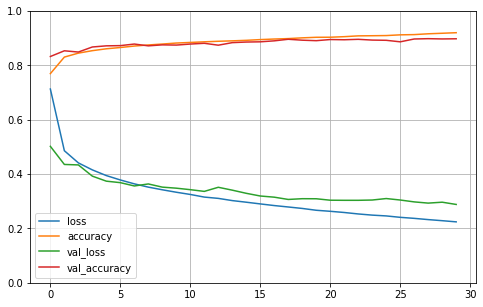

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Wyznacza zakres osi pionowej od 0 do 1
plt.show()



In [12]:
model_conv = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model_conv.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [14]:
history_conv = model_conv.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

Epoch 1/3
1719/1719 [==============================] - 81s 47ms/step - loss: 0.6884 - accuracy: 0.7489 - val_loss: 0.4774 - val_accuracy: 0.8312
Epoch 2/3
1719/1719 [==============================] - 85s 49ms/step - loss: 0.6038 - accuracy: 0.7825 - val_loss: 0.4265 - val_accuracy: 0.8406
Epoch 3/3
1719/1719 [==============================] - 78s 45ms/step - loss: 0.5459 - accuracy: 0.8064 - val_loss: 0.4083 - val_accuracy: 0.8522


In [15]:
model_conv.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 256)        

In [6]:
pd.DataFrame(history_conv.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Wyznacza zakres osi pionowej od 0 do 1
plt.show()


NameError: name 'history_conv' is not defined

In [ ]:
import os
import tarfile
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("zestawy danych", "mieszkania")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
    
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

fetch_housing_data()
housing = load_housing_data()

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)